In [1]:
from MultivariateNormalDistribution import mvn

import numpy as np

# Testing the Implementation

In [2]:
print("======Creating Ground Truth=====\n")
dimensions = 4
mu = (np.random.uniform(0,1,dimensions)).reshape(dimensions,1)*20
print("Ground truth mu: \n{}".format(mu))
#covariance = datasets.make_spd_matrix(dimensions) #np.random.rand(dimensions,dimensions) # TODO gallery??
covariance = np.identity(dimensions)

MVN1 = mvn.MultivariateNormalDistribution(dimensions=dimensions, mean=mu, covariance=covariance, name="MVN1")

# Sample MVN1
N = 5
samples = MVN1.sampleDistribution(N)
print("samples: {}\n".format(samples))

print("\n======Setting parameters for MAP=====\n")

mvn_prior = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="mvn_prior")
mvn_prior.MLE(samples)

nu0 = N;
S_0 = np.multiply(np.diag(np.diag(mvn_prior.sigma)),nu0)
m_0 = mvn_prior.mu
kappa0 = N

print("\n======Creating MVN2(using MLE) and MVN3(using MAP)=====\n")

# Sample MVN1 again
N = 50
samples = MVN1.sampleDistribution(N)
# MVM2 will only do MLE
MVN2 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="MVN2");
# MVN3 will have a prior and do posterior analysis
MVN3 = mvn.MultivariateNormalDistribution(dimensions=dimensions, m0=m_0, S0=S_0 , kappa=kappa0, nu=nu0, name="MVN3")

MVN2.MLE(samples)
MVN3.MAP(samples)


print("\n=====Compute likelihood========\n")
N = 5
samples_test = MVN1.sampleDistribution(N)
print("samples_test: {}\n".format(samples_test))

lik1 = MVN1.logpdf(samples_test)
lik2 = MVN2.logpdf(samples_test)
lik3 = MVN3.logpdf(samples_test)
loglik1 = MVN1.loglikelihood(samples_test)
loglik2 = MVN2.loglikelihood(samples_test)
loglik3 = MVN3.loglikelihood(samples_test)
lik3_2 = MVN3.logPosteriorPredictive(samples_test)
loglik3_2 = np.sum(lik3_2)


print("likelihood of {}: \n{}".format(MVN1.name,lik1))
print("loglikelihood of {}: \n{}\n".format(MVN1.name,loglik1))
print("likelihood of {}: \n{}".format(MVN2.name,lik2))
print("loglikelihood of {}: \n{}\n".format(MVN2.name,loglik2))
print("likelihood of {}: \n{}".format(MVN3.name,lik3))
print("loglikelihood of {}: \n{}".format(MVN3.name,loglik3))
print("posterior predictive tstudent of {}: \n{}".format(MVN3.name, lik3_2))
print("loglikelihood of {}: \n{}".format(MVN3.name,loglik3_2))

======Creating Ground Truth=====

Ground truth mu: 
[[ 3.13778329]
 [14.37309623]
 [ 1.41628839]
 [19.05671623]]
samples: [[ 1.77388876  3.45987981  2.47722667  2.75151675  2.62287155]
 [15.33592394 15.25477492 11.7135674  14.92538139 13.92443906]
 [ 1.58001344  1.51827585  2.14544511  1.59956705  0.33688199]
 [22.44847416 17.61592681 19.63030166 18.63638477 18.70512497]]


======Setting parameters for MAP=====


======Creating MVN2(using MLE) and MVN3(using MAP)=====


=====Compute likelihood========

samples_test: [[ 4.14743056  1.06466157  3.45541385  2.37099092  3.16806334]
 [15.84974757 15.0454632  12.75199177 14.66233054 14.83589875]
 [ 1.70732237  1.84210073  0.6256594   1.97567972  1.39808385]
 [20.40630283 19.35079862 18.2777802  18.24688565 19.41398586]]

likelihood of MVN1: 
[[-6.22873991]
 [-6.18460993]
 [-5.65610633]
 [-4.49593977]
 [-3.84729216]]
loglikelihood of MVN1: 
-26.41268808300296

likelihood of MVN2: 
[[-6.5984467 ]
 [-5.5619372 ]
 [-5.37931527]
 [-4.76637343]
 [

# Testing the implementation with the iris dataset

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Helper functions
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

=====================type 1================================
mu_type_1:
[[5.0375]
 [3.44  ]]
logpdf_type_1:
[[ 0.55239429]
 [-5.26949267]
 [-1.47695181]
 [ 0.55239429]
 [-0.25354511]
 [-0.19473364]
 [-0.25354511]
 [-0.19374826]
 [ 0.32351011]
 [ 0.51104301]]
loglikelihood_type_1:
-5.702674897637911
=====================type 2================================
mu_type_2:
[[6.01]
 [2.78]]
logpdf_type_2:
[[-0.41251194]
 [-0.16366395]
 [-0.08495801]
 [-1.99225925]
 [-0.2532239 ]
 [-0.7248035 ]
 [-0.39537342]
 [-0.01277828]
 [-1.474835  ]
 [-0.18882499]]
loglikelihood_type_2:
-5.703232241505485
=====================type 3================================
mu_type_3:
[[6.6225]
 [2.96  ]]
logpdf_type_3:
[[-0.30668696]
 [-0.33002325]
 [-0.9799198 ]
 [-0.47837877]
 [-0.82836602]
 [-0.2223177 ]
 [-1.19390785]
 [-0.25733504]
 [-2.12189877]
 [-1.04561196]]
loglikelihood_type_3:
-7.764446122786154


/usr/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


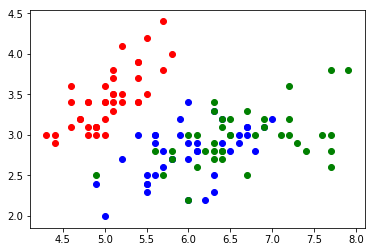

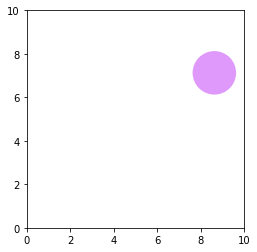

In [13]:
iris = datasets.load_iris()
X = iris.data # Features
y = iris.target # Targets

dimensions = 2

# Only take 2 dimensions
X = X[:,range(0,dimensions)]

# Generate training and test data for first type of iris
X_type_1 = X[y==0]
X_type_1_train = np.transpose(X_type_1[range(0,40),:])
X_type_1_test = np.transpose(X_type_1[range(40,50),:])


X_type_2 = X[y==1]
X_type_2_train = np.transpose(X_type_2[range(0,40),:])
X_type_2_test = np.transpose(X_type_2[range(40,50),:])

X_type_3 = X[y==2]
X_type_3_train = np.transpose(X_type_3[range(0,40),:])
X_type_3_test = np.transpose(X_type_3[range(40,50),:])

print("=====================type 1================================")
mvn_type_1 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="type1")
mvn_type_1.MLE(X_type_1_train)
logpdf_type_1 = mvn_type_1.logpdf(X_type_1_test)
log_likelihood_1 = mvn_type_1.loglikelihood(X_type_1_test)

print("mu_type_1:\n{}".format(mvn_type_1.mu))
print("logpdf_type_1:\n{}".format(logpdf_type_1))
print("loglikelihood_type_1:\n{}".format(log_likelihood_1))

print("=====================type 2================================")
mvn_type_2 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="type2")
mvn_type_2.MLE(X_type_2_train)
logpdf_type_2 = mvn_type_2.logpdf(X_type_2_test)
log_likelihood_2 = mvn_type_2.loglikelihood(X_type_2_test)

print("mu_type_2:\n{}".format(mvn_type_2.mu))
print("logpdf_type_2:\n{}".format(logpdf_type_2))
print("loglikelihood_type_2:\n{}".format(log_likelihood_2))
print("=====================type 3================================")
mvn_type_3 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="type3")
mvn_type_3.MLE(X_type_3_train)
logpdf_type_3 = mvn_type_3.logpdf(X_type_3_test)
log_likelihood_3 = mvn_type_3.loglikelihood(X_type_3_test)

print("mu_type_3:\n{}".format(mvn_type_3.mu))
print("logpdf_type_3:\n{}".format(logpdf_type_3))
print("loglikelihood_type_3:\n{}".format(log_likelihood_3))

# Plot
fig = plt.figure()

X_01, X_02 = X_type_1_train[0, :], X_type_1_train[1,:]
X_11, X_12 = X_type_2_train[0, :], X_type_2_train[1,:]
X_21, X_22 = X_type_3_train[0, :], X_type_3_train[1,:]

plt.scatter(X_01, X_02, color='r')
plt.scatter(X_11, X_12, color='b')
plt.scatter(X_21, X_22, color='g')

fig.show()


from matplotlib.patches import Ellipse
import numpy.random as rnd
ells = Ellipse(xy=rnd.rand(2)*10, width=2, height=2, angle=0)
fig2 = plt.figure()
ax = fig2.add_subplot(111, aspect='equal')
ax.add_artist(ells)
ells.set_clip_box(ax.bbox)
ells.set_alpha(rnd.rand())
ells.set_facecolor(rnd.rand(3))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

fig2.show()